In [88]:
import numpy as np
from scipy import integrate as intg
import time
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors as mclr

ps = 1.
um = 1.
nm = 1.e-3*um
phi0 = 1.

### Plotting settings 
#plt.rc('figure', dpi=100)
#plt.rc('figure',figsize=(4,1.7))
#plt.rc('font', family = 'Times New Roman')
#plt.rc('font', size = 14)
#plt.rc('text', usetex=True)
#plt.rc('xtick', labelsize=14)
#plt.rc('ytick', labelsize=14)
#plt.rc('axes', labelsize=18)
#plt.rc('lines', linewidth=2.5)


In [104]:
from collections import namedtuple
params = namedtuple('params','lPearl sigma2D xiGL tauGL Jdc Jps t0 td')

In [105]:
### External current time dependence 
def Jext(t,pars):
    return pars.Jdc + pars.Jps*np.exp(-(t-pars.t0)**2/pars.td**2 )

### TDGL EQOM including order parameter relaxation
### X = (Q,f)
def eom(t,X,pars):
    Q = X[0]
    f = X[1]
    dXdt = np.zeros_like(X)
    dXdt[0] = 1./pars.sigma2D*Jext(t,pars) - 0.5*pars.lPearl/pars.sigma2D*f**2*Q
    dXdt[1] = 1./pars.tauGL*(1.-f**2-(2.*np.pi*pars.xiGL*Q/phi0)**2 )*f

    return dXdt


In [118]:
lPearl = 1.
sigma2D = 1.
xiGL = 10.*nm
tauGL = 0.6*ps
Jps = -0.019*phi0/nm
Jdc = 0.015*phi0/nm
t0 = 0.
td = 3.*ps 


par = params(lPearl,sigma2D,xiGL,tauGL,Jdc,Jps,t0,td)

In [119]:
ti = -12.*ps
tf = 30.*ps
nt = 1000

times = np.linspace(ti,tf,nt)
X0 = np.array([0.,0.6])

sol = intg.solve_ivp(eom,(times[0],times[-1]),X0,t_eval=times,args=(par,))

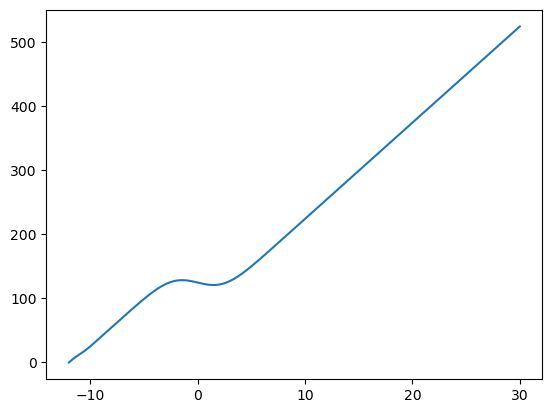

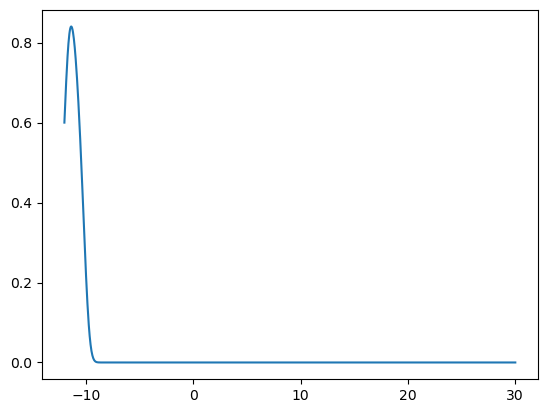

In [120]:
plt.plot(sol.t[:],sol.y[0,:])
plt.show()
plt.plot(sol.t[:],sol.y[1,:])
plt.show()

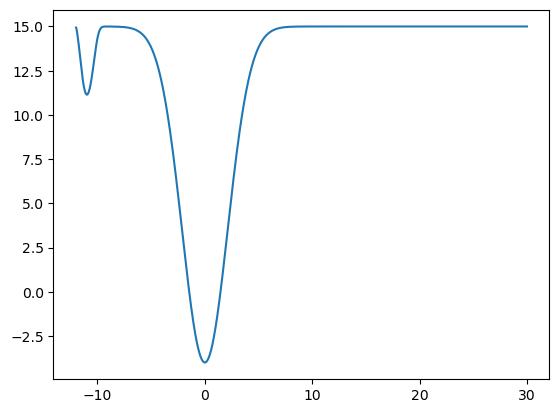

In [121]:
plt.plot(sol.t[:],par.sigma2D*np.gradient(sol.y[0,:],times[1]-times[0]))
#plt.plot(sol.t[:],Jext(sol.t,par))
plt.show()